In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import matplotlib as mpl
import plotly.express as px


## DATASET: PREDICCIÓN PRECIO DE PALTAS

In [3]:
pd.read_csv('/workspaces/CoderHouse_CH-32845/data/raw/avocado.csv')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df = pd.read_csv('/workspaces/CoderHouse_CH-32845/data/raw/avocado.csv')

In [5]:
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


## Valores Faltantes

In [10]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Eliminación de Columnas innecesarias

In [13]:
df.drop('Unnamed: 0', axis = 1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [24]:
df_selection = df.loc[:, ['AveragePrice', 'Total Volume', 'Total Bags', 'type', 'year', 'region']]
df_selection.head()



,AveragePrice,Total Volume,Total Bags,type,year,region
0,1.33,64236.62,8696.87,conventional,2015,Albany
1,1.35,54876.98,9505.56,conventional,2015,Albany
2,0.93,118220.22,8145.35,conventional,2015,Albany
3,1.08,78992.15,5811.16,conventional,2015,Albany
4,1.28,51039.60,6183.95,conventional,2015,Albany


In [25]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [44]:
regions = df.groupby(df.region)
print ("Regiones Totales :", len(regions))
print(".........")
for name, group in regions:
    print(name, " : ", len(group))

Regiones Totales : 54
.........
Albany  :  338
Atlanta  :  338
BaltimoreWashington  :  338
Boise  :  338
Boston  :  338
BuffaloRochester  :  338
California  :  338
Charlotte  :  338
Chicago  :  338
CincinnatiDayton  :  338
Columbus  :  338
DallasFtWorth  :  338
Denver  :  338
Detroit  :  338
GrandRapids  :  338
GreatLakes  :  338
HarrisburgScranton  :  338
HartfordSpringfield  :  338
Houston  :  338
Indianapolis  :  338
Jacksonville  :  338
LasVegas  :  338
LosAngeles  :  338
Louisville  :  338
MiamiFtLauderdale  :  338
Midsouth  :  338
Nashville  :  338
NewOrleansMobile  :  338
NewYork  :  338
Northeast  :  338
NorthernNewEngland  :  338
Orlando  :  338
Philadelphia  :  338
PhoenixTucson  :  338
Pittsburgh  :  338
Plains  :  338
Portland  :  338
RaleighGreensboro  :  338
RichmondNorfolk  :  338
Roanoke  :  338
Sacramento  :  338
SanDiego  :  338
SanFrancisco  :  338
Seattle  :  338
SouthCarolina  :  338
SouthCentral  :  338
Southeast  :  338
Spokane  :  338
StLouis  :  338
Syracuse  :

### Cada una de las regiones tiene 338 entradas. El siguiente paso es elegir una región, para la cual nos gustaría poder predecir el precio futuro de las paltas

In [47]:
PREDICTING_FOR = "TotalUS"

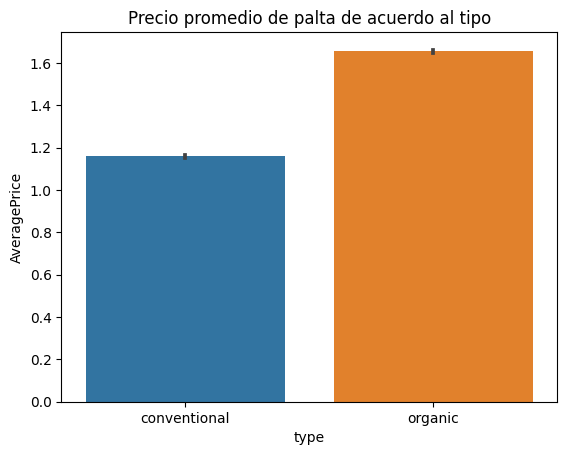

In [13]:
plt.figure()
plt.title("Precio promedio de palta de acuerdo al tipo")
sns.barplot(x="type", y="AveragePrice", data=df)
plt.show()


### El gráfico anterior presta importancia en poder determinar visualmente y de manera rapida que las paltas de tipo organico tienen un mayor precio que las de tipo convencional

Text(0, 0.5, 'Precio Promedio')

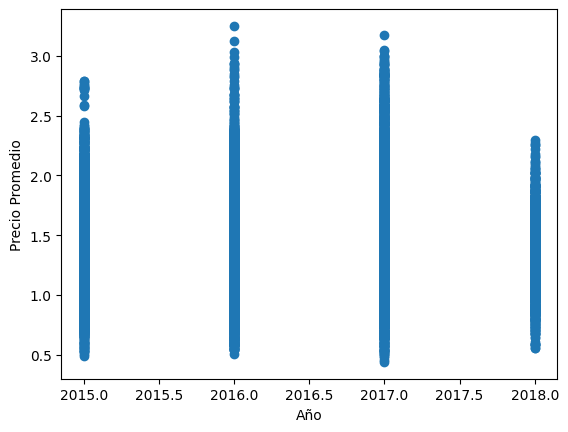

In [34]:
plt.scatter(df['year'], df['AveragePrice'])
plt.xlabel('Año')
plt.ylabel('Precio Promedio')


## Precio promedio del tipo de palta en cada region

Text(0.5, 1.0, 'Tipo promedio por region')

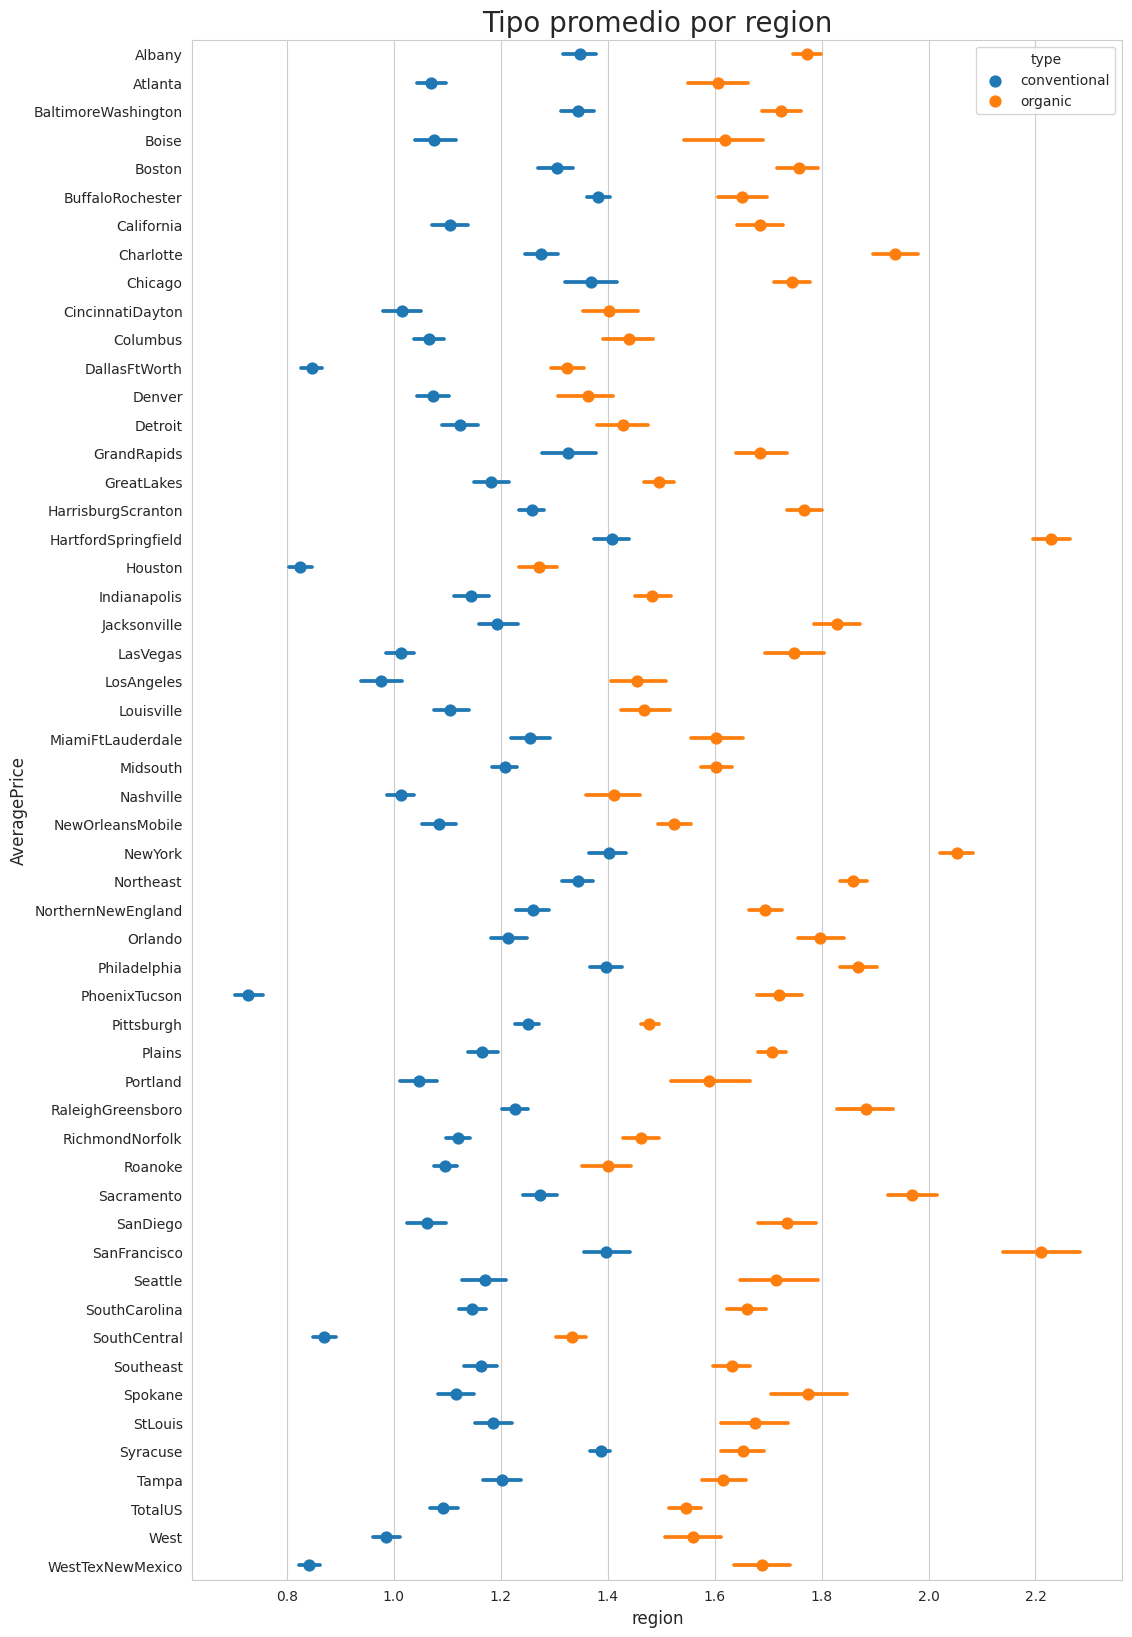

In [19]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type', join=False)
plt.xlabel('region', {'fontsize' : 'large'})
plt.ylabel('AveragePrice', {'fontsize' : 'large'})
plt.title("Tipo promedio por region", {'fontsize' : 20})


Text(0.5, 1.0, 'Precio promedio por region')

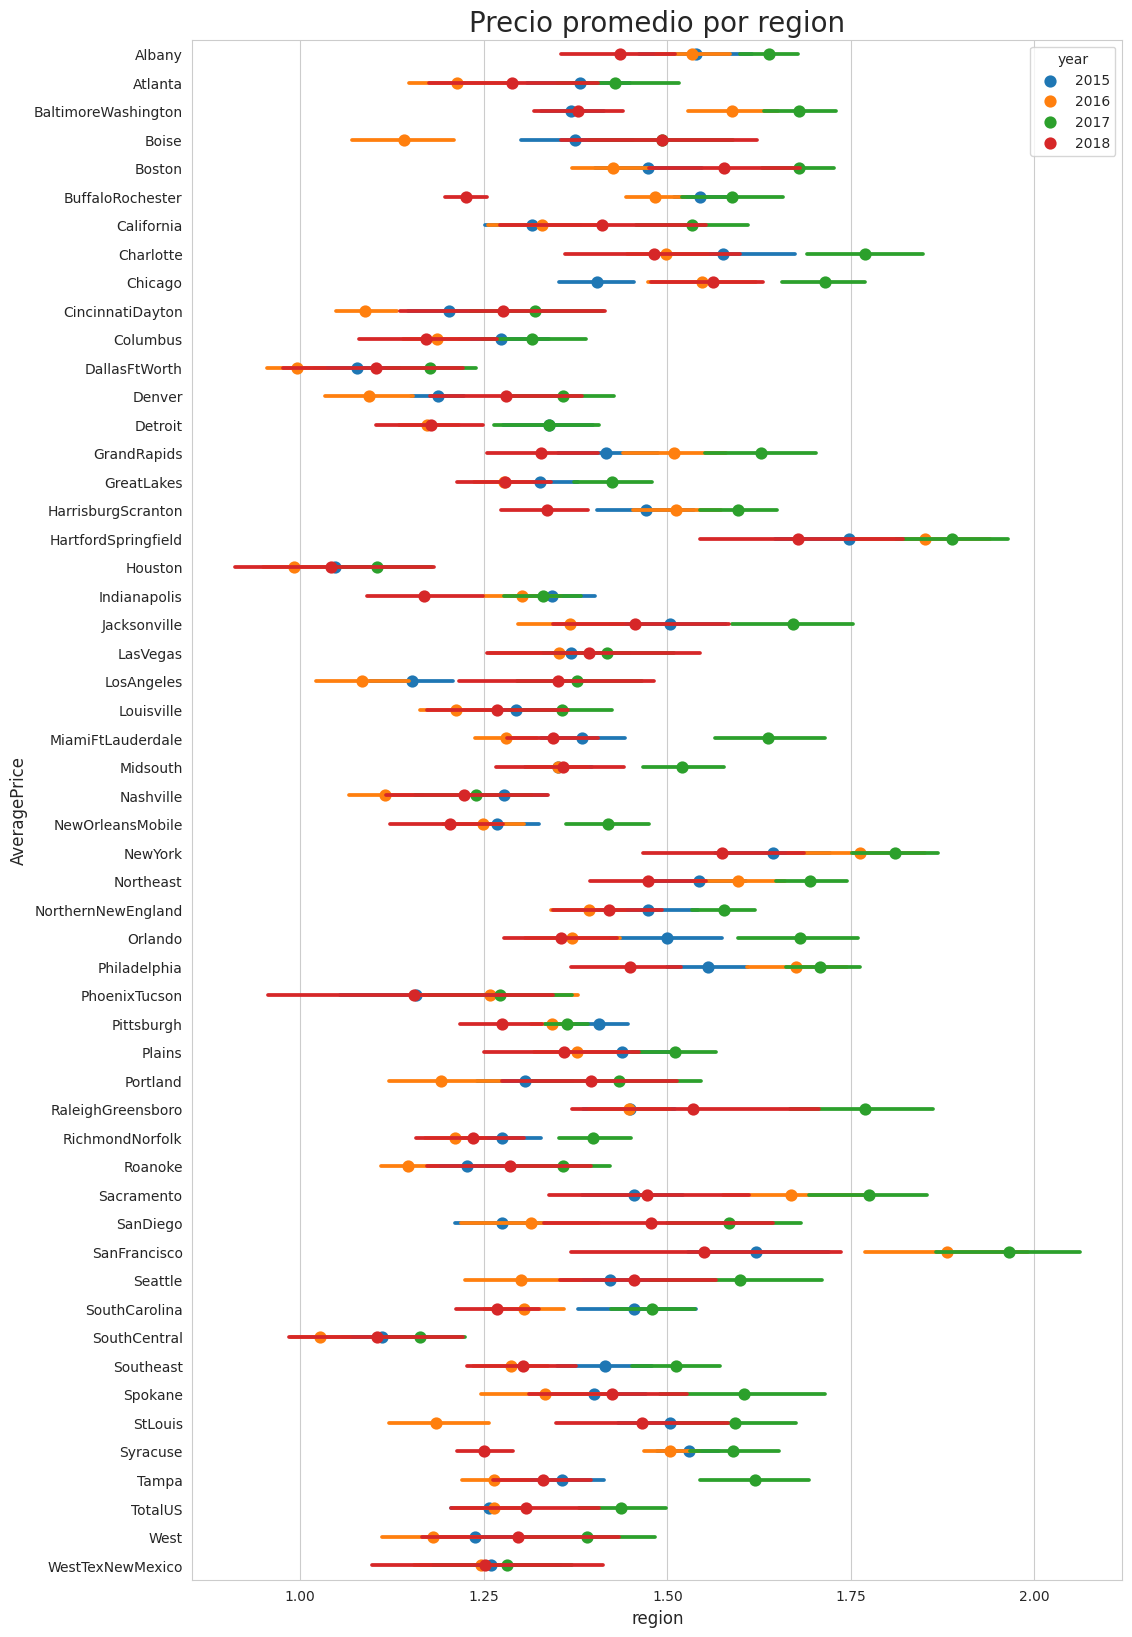

In [17]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='year', join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region', {'fontsize' : 'large'})
plt.ylabel('AveragePrice', {'fontsize' : 'large'})
plt.title("Precio promedio por region", {'fontsize' : 20})

### De este gráfico se puede determinar que la palta organica es mas cara que la tradicional, de acuerdo a las diferentes regiones

## Distribución del precio promedio

Text(0.5, 1.0, 'Precio promedio')

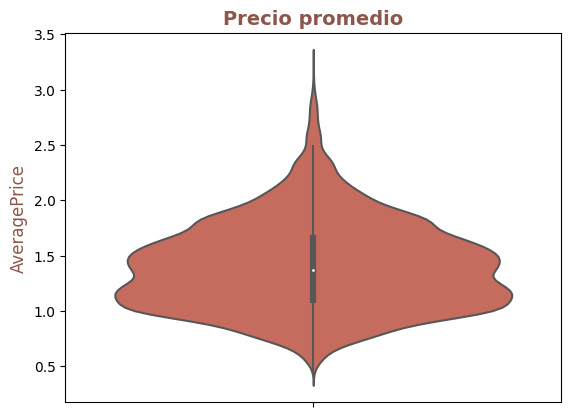

In [15]:
sns.violinplot(y=df['AveragePrice'], color='#d6604d')
plt.ylabel('AveragePrice', fontdict = {'fontsize':12, 'color':'tab:brown'})
plt.title('Precio promedio', fontdict = {'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:brown'})

In [19]:
fig = px.histogram(df, x='AveragePrice', color='type', marginal='box', hover_data=df.columns)
fig.show()



<AxesSubplot: xlabel='AveragePrice', ylabel='type'>

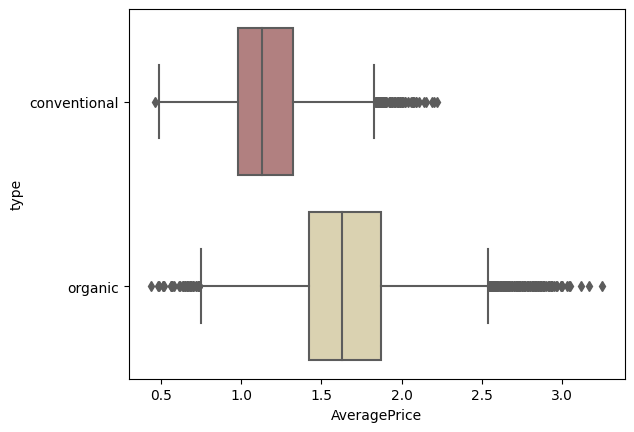

In [16]:
sns.boxplot(y='type', x='AveragePrice', data=df, palette = 'pink')


### Se puede interpretar que el precio de la palta organica es mayor, en comparación al de tipo convencional